In [110]:
import pandas as pd
try:
    df = pd.read_csv('/content/amazon_alexa.tsv', sep='\t')
    df.to_csv('output.csv', index=False)
    print("Successfully converted TSV to CSV.")
except FileNotFoundError:
    print("Error: input.tsv not found. Please make sure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully converted TSV to CSV.


In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [114]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [115]:
df['verified_reviews'].head()

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music


In [116]:
df.isnull().sum()

,0
rating,0
date,0
variation,0
verified_reviews,1
feedback,0


In [117]:
df.dropna(inplace=True)

In [118]:
df.isnull().sum()

,0
rating,0
date,0
variation,0
verified_reviews,0
feedback,0


In [119]:
df['rating'].unique()

array([5, 4, 3, 2, 1])

In [120]:
df['feedback'].unique()

array([1, 0])

<Axes: xlabel='rating', ylabel='count'>

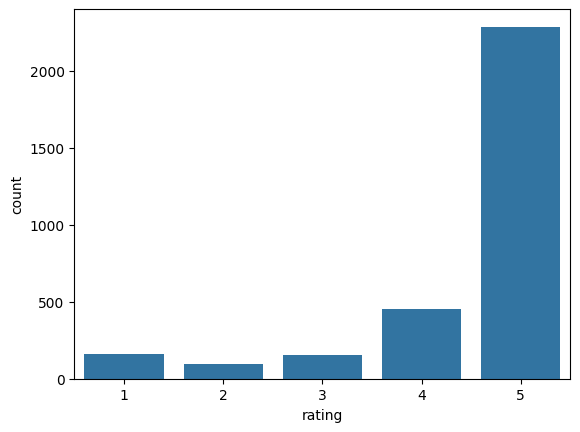

In [121]:
sns.countplot(data=df,x='rating')

<Axes: xlabel='feedback', ylabel='count'>

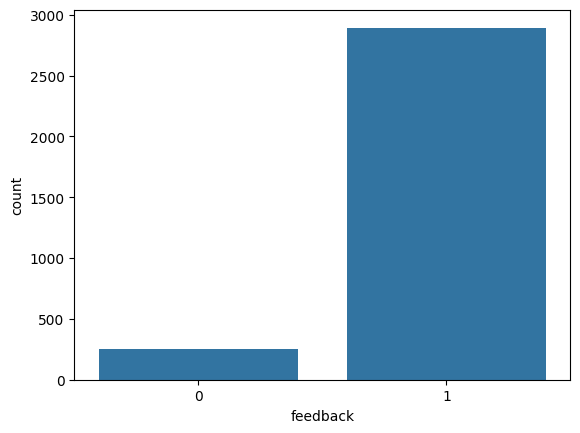

In [122]:
sns.countplot(data=df,x='feedback')

<Axes: >

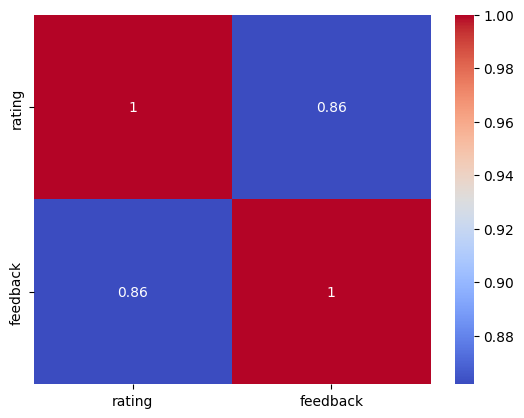

In [123]:
df_corr = df[['rating', 'feedback']].corr()
sns.heatmap(df_corr, cmap='coolwarm', annot=True)

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

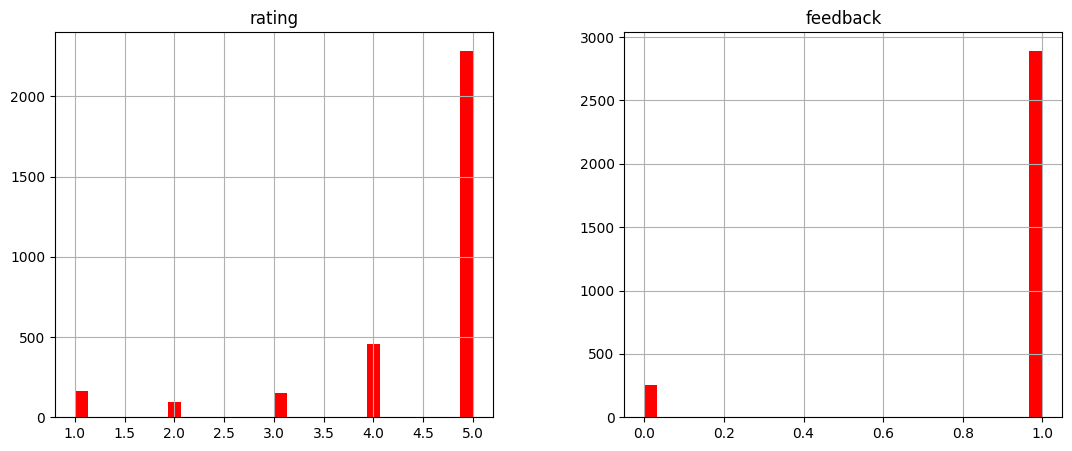

In [124]:
df.hist(bins = 30, figsize = (13,5), color = 'r')

In [125]:
df['length'] = df['verified_reviews'].apply(len)

In [126]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [127]:
df.describe()

,rating,feedback,length
count,3149.000000,3149.000000,3149.000000
mean,4.463957,0.918704,132.090187
std,1.067773,0.273332,182.114569
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


In [128]:
df['feedback'].value_counts()

,count
feedback,
1,2893
0,256


In [129]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.feedback==1]
df_minority = df[df.feedback==0]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # for reproducible results

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
display(df_balanced.feedback.value_counts())

,count
feedback,
1,2893
0,2893


In [130]:
df=df_balanced

In [131]:
df.describe()

,rating,feedback,length
count,5786.000000,5786.000000,5786.000000
mean,3.049430,0.500000,167.920671
std,1.765014,0.500043,209.717864
min,1.000000,0.000000,1.000000
25%,1.000000,0.000000,34.000000
50%,2.500000,0.500000,99.000000
75%,5.000000,1.000000,212.750000
max,5.000000,1.000000,2851.000000


In [132]:
df[df['length'] == 167]['verified_reviews'].iloc[0]

'Best price we could find and it is so useful to have her around to answer questions. It is so handy to not have to find your phone. I also now have an intercom system.'

<Axes: xlabel='length', ylabel='Count'>

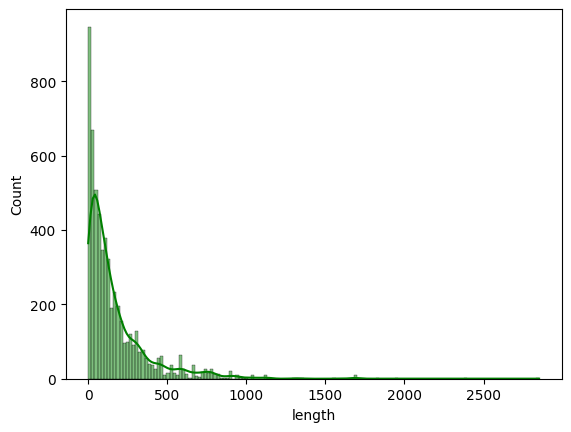

In [133]:
sns.histplot(df['length'],kde=True,color='green')

In [134]:
positive = df[df['feedback']==1]
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [135]:
negative = df[df['feedback']==0]
negative

,rating,date,variation,verified_reviews,feedback,length
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17
1378,2,17-Jul-18,Black Spot,Fairly useless.,0,15
1558,1,30-Jul-18,Black Show,,0,1
882,2,29-Jul-18,Charcoal Fabric,Really disappointed Alexa has to be plug-in to...,0,338
2611,1,30-Jul-18,Black Dot,This worked well for about 6 months but then s...,0,288
...,...,...,...,...,...,...
2866,1,30-Jul-18,Black Dot,The volume is very low,0,22
1104,2,30-Jul-18,Black Spot,"As an Alexa device, it works just as well as a...",0,903
1277,2,24-Jul-18,Black Spot,ALEXA IS NOT AS SMART AS SIRI! CANNOT CANCEL S...,0,116
1306,1,22-Jul-18,Black Spot,Can’t be used as a baby monitor which is why I...,0,367


In [136]:
sentences = df['verified_reviews'].tolist()
len(sentences)

5786

In [137]:
sentences_as_one_string =" ".join(sentences)

In [138]:
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [139]:
!pip install wordcloud

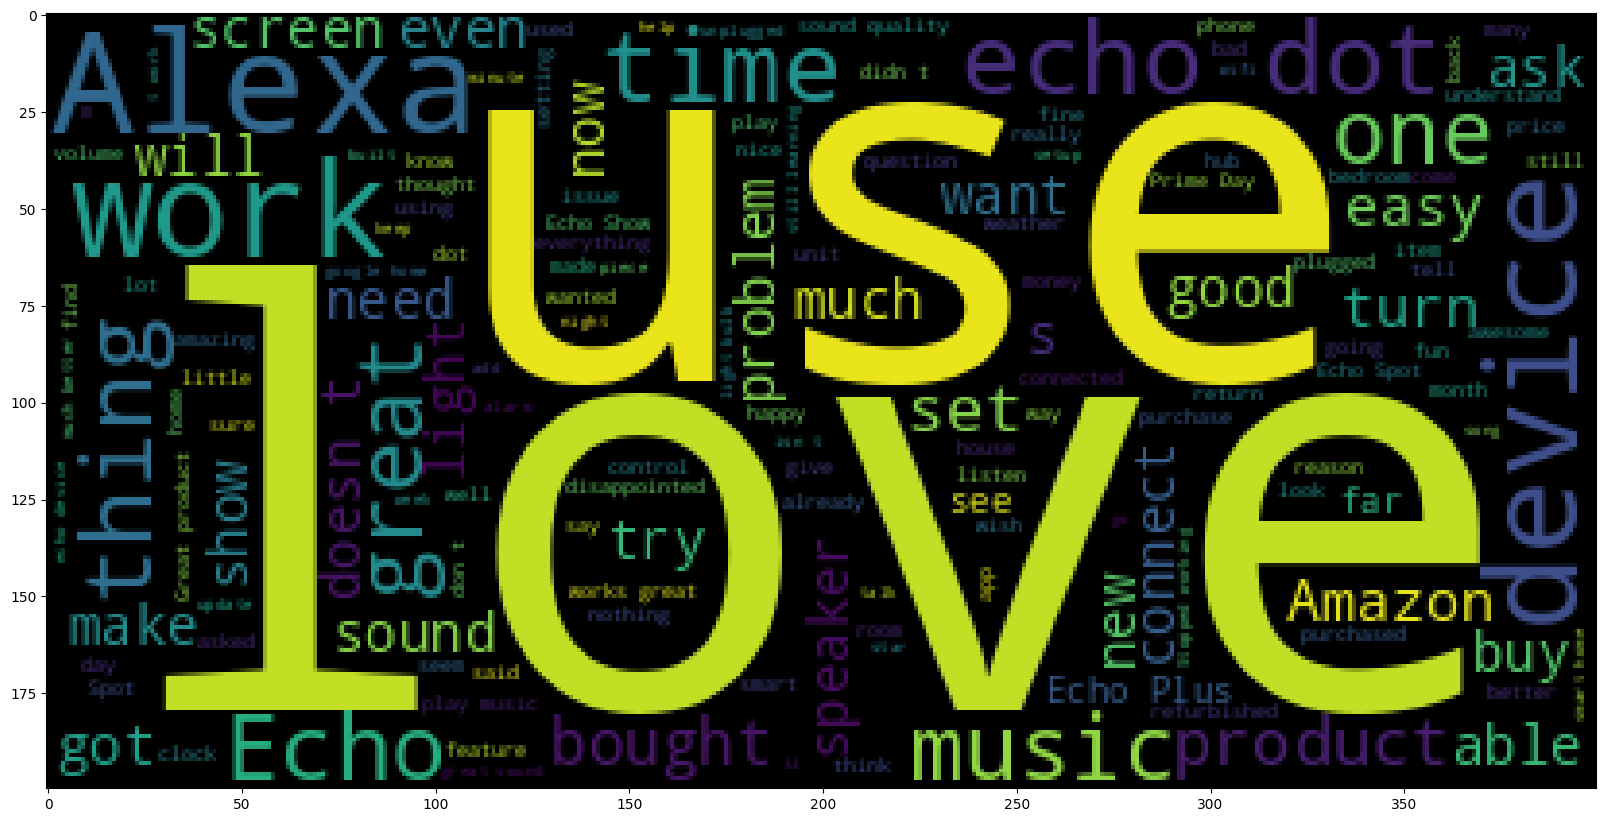

In [140]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [141]:
sentences = positive['verified_reviews'].tolist()
len(sentences)

2893

In [142]:
sentences_as_one_string =" ".join(sentences)

In [143]:
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

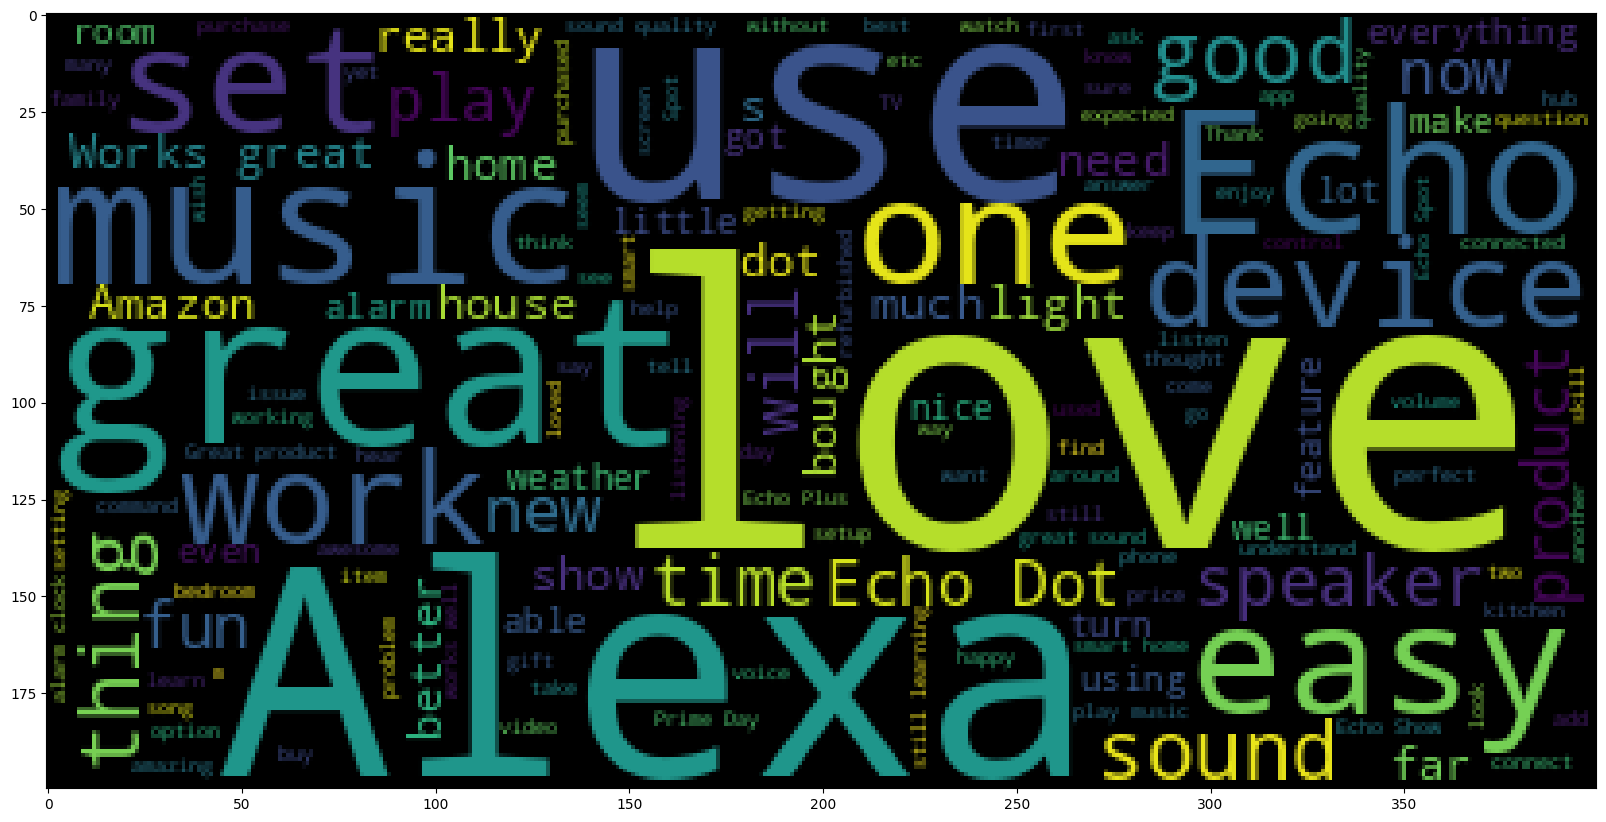

In [144]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [145]:
sentences = negative['verified_reviews'].tolist()
len(sentences)
sentences_as_one_string=' '.join(sentences)

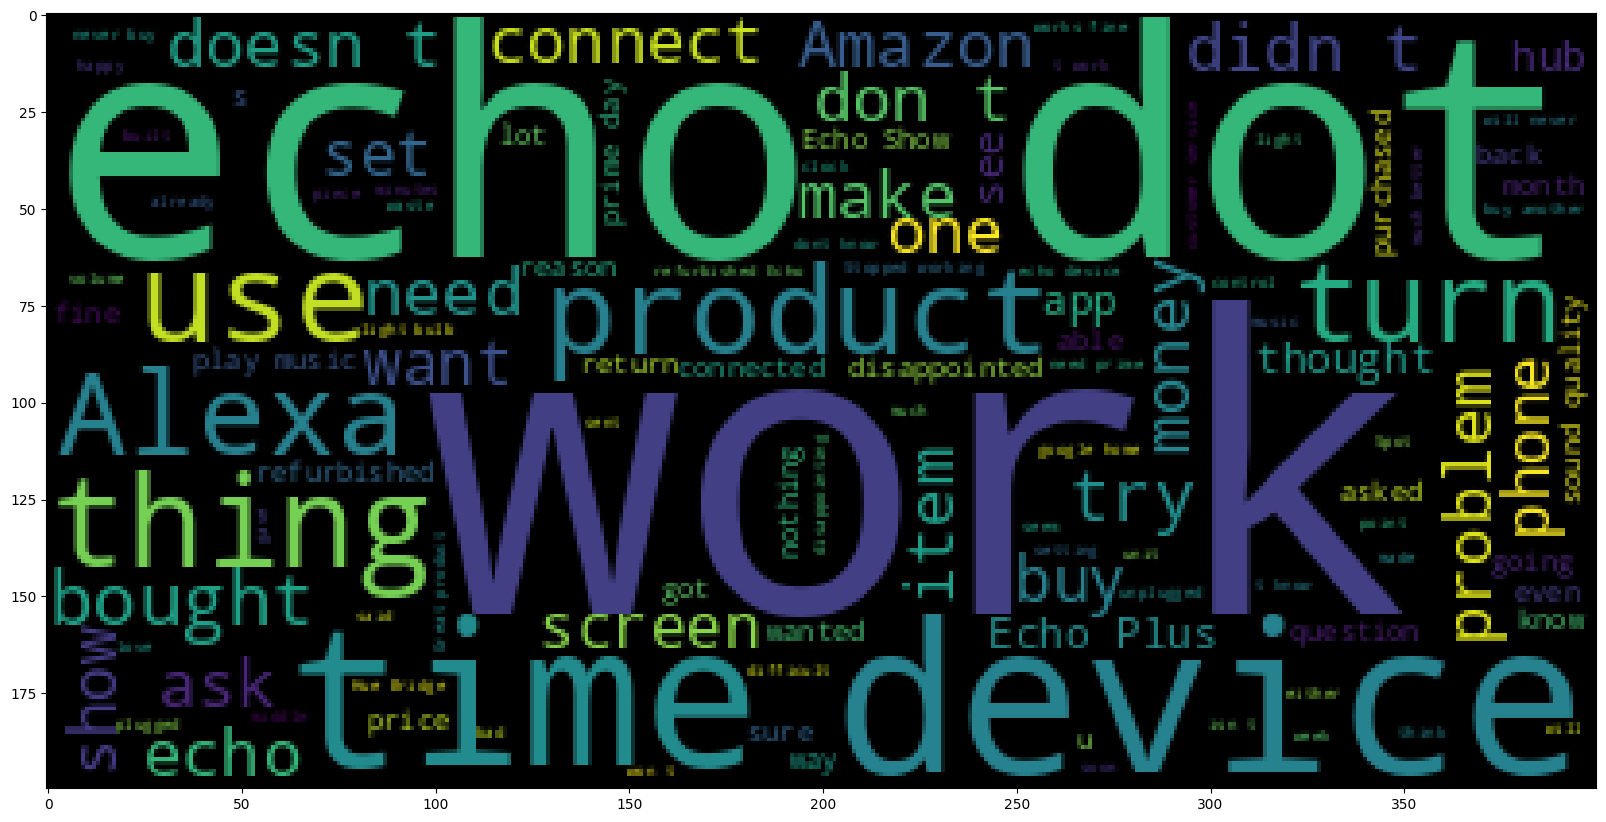

In [146]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

PERFORM DATA CLEANING

In [147]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [148]:
Test = '$I love AI & Machine learning!!'
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'I love AI  Machine learning'

In [149]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [150]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'A',
 'I']

In [151]:
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

In [152]:
import nltk # Natural Language tool kit
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [153]:
Test_punc_removed_join = 'I enjoy coding, programming and Artificial intelligence'
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [154]:
Test_punc_removed_join_clean

['enjoy', 'coding,', 'programming', 'Artificial', 'intelligence']

In [155]:
Test_punc_removed_join

'I enjoy coding, programming and Artificial intelligence'

In [156]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'
challege = [ char     for char in mini_challenge  if char not in string.punctuation ]
challenge = ''.join(challege)
challenge


'Here is a mini challenge that will teach you how to remove stopwords and punctuations'

In [157]:
challenge = [  word for word in challenge.split() if word.lower() not in stopwords.words('english')  ]
challenge

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

In [158]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [159]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'paper' 'second' 'the' 'third' 'this']


In [160]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 22 stored elements and shape (4, 10)>

In [161]:
print(X.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


In [162]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

# mini_challenge = ['Hello World', 'Hello Hello Hello World world', 'Hello Hello World world world World']

vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)
print(X_challenge.toarray())


[[1 1]
 [2 1]
 [1 3]]


In [163]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [164]:
df_clean = df['verified_reviews'].apply(message_cleaning)

In [165]:
print(df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [166]:
df_clean.head()

,verified_reviews
0,"[Love, Echo]"
1,[Loved]
2,"[Sometimes, playing, game, answer, question, c..."
3,"[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,[Music]


In [167]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(df['verified_reviews'])

In [168]:
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [169]:
print(tweets_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [170]:
tweets_countvectorizer.shape

(5786, 5211)

In [171]:
X = pd.DataFrame(tweets_countvectorizer.toarray())


In [172]:
y=df['feedback']

In [173]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [174]:
X.shape

(5786, 5211)

In [175]:
y.shape

(5786,)

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [177]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
X_train.columns = X_train.columns.astype(str)
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [178]:
from sklearn.metrics import classification_report, confusion_matrix

Accuracy: 0.9309153713298791


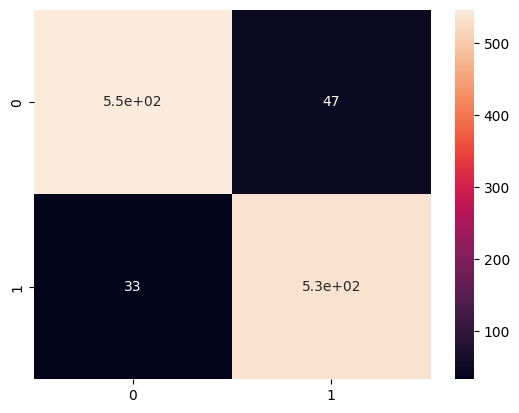

In [180]:
# Predicting the Test set results
X_test.columns = X_test.columns.astype(str)
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict_test)
print(f"Accuracy: {accuracy}")

In [181]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       593
           1       0.92      0.94      0.93       565

    accuracy                           0.93      1158
   macro avg       0.93      0.93      0.93      1158
weighted avg       0.93      0.93      0.93      1158



              precision    recall  f1-score   support

           0       0.96      0.93      0.94       593
           1       0.93      0.96      0.94       565

    accuracy                           0.94      1158
   macro avg       0.94      0.94      0.94      1158
weighted avg       0.94      0.94      0.94      1158

Accuracy: 0.9430051813471503


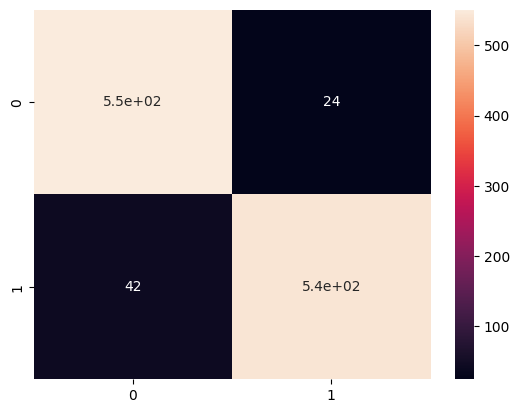

In [182]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       593
           1       0.85      0.91      0.88       565

    accuracy                           0.88      1158
   macro avg       0.88      0.88      0.88      1158
weighted avg       0.88      0.88      0.88      1158



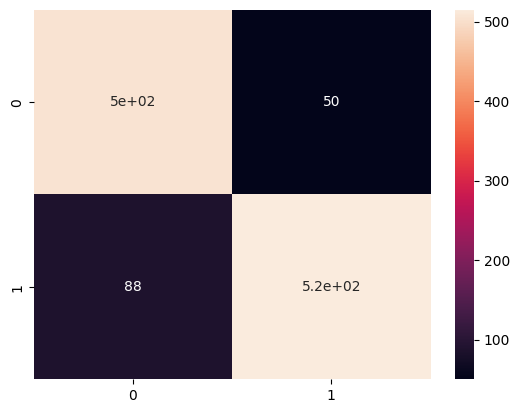

In [183]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

In [184]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8808290155440415


In [185]:
from sklearn.svm import SVC


In [186]:
model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC()

In [187]:
y_pred_svc = model_svc.predict(X_test)

In [188]:
from sklearn.metrics import accuracy_score

accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy of SVC model: {accuracy_svc}")

Accuracy of SVC model: 0.9568221070811744


In [190]:
# Create some sample new reviews
new_reviews = [
    "This product is amazing! I love it.",
    "It stopped working after a week.",
    "Mediocre performance, not worth the price.",
    "Best purchase I've made in a long time!",
    "Terrible quality and poor customer service."
]

# Vectorize the new reviews using the same vectorizer
new_reviews_countvectorizer = vectorizer.transform(new_reviews)
X_new = pd.DataFrame(new_reviews_countvectorizer.toarray())
X_new.columns = X_new.columns.astype(str) # Ensure column names are strings

# Predict the feedback using the trained SVC model
new_predictions_svc = model_svc.predict(X_new)

# Display the new reviews and their predicted feedback
for review, feedback in zip(new_reviews, new_predictions_svc):
    print(f"Review: {review} -> Predicted Feedback: {'Positive' if feedback == 1 else 'Negative'}")

Review: This product is amazing! I love it. -> Predicted Feedback: Positive
Review: It stopped working after a week. -> Predicted Feedback: Negative
Review: Mediocre performance, not worth the price. -> Predicted Feedback: Positive
Review: Best purchase I've made in a long time! -> Predicted Feedback: Positive
Review: Terrible quality and poor customer service. -> Predicted Feedback: Negative
